We begin by importing all the necessary libraries. We use scipy's odeint for the numerical integration.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

Our first solution is for an Universe compounded solely by matter (both baryonic and Dark). 

In [ ]:
#Function for a Universe that contains only matter (both barionic and dark)
def aM(a,t): #numerical resolution
    H_0 = 2.29*(10**-10) #hubble constant H_0
    daMdt = H_0/(np.sqrt(a))
    return daMdt
def aManalytic(t): #analytical resolution
    H_0 = 2.29*(10**-10) #hubble constant H_0
    aManalytic = ((H_0*t*3)/2)**(2/3)
    return aManalytic

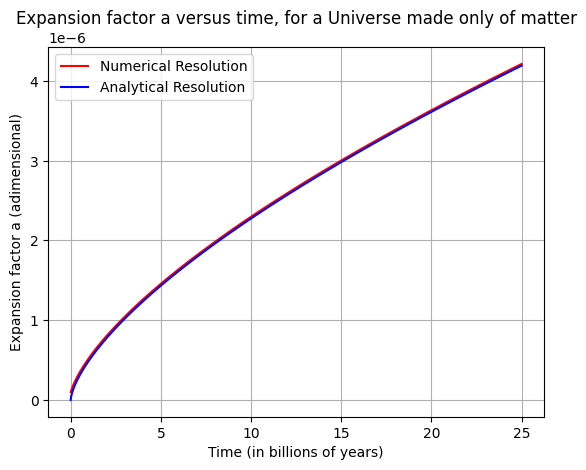

In [3]:
t = np.linspace(0,25,100000) #time interval
sol = odeint(aM,[0.0000001],t) #solving ODE, with y(0) \approx 0
aList = [aManalytic(tv) for tv in t] #list keeping the values for analytic resolution
plt.plot(t,sol,"r", label='Numerical Resolution')
plt.plot(t,aList,"b", label='Analytical Resolution')
plt.title('Expansion factor a versus time, for a Universe made only of matter')
plt.xlabel('Time (in billions of years)')
plt.ylabel('Expansion factor a (adimensional)')
plt.legend()
plt.grid()
plt.show()

Then, we follow for the solution of an Universe made only of Radiation. This is a close approximation for the early Universe, when Radiation was the most abundant component of our Universe.

In [ ]:
#function for a Universe made only of radiation
def aR(a,t): #numerical resolution
    H_0 = 2.29*(10**-10) #hubble constant H_0
    daRdt = H_0/a
    return daRdt
def aRanalytic(t): #analytical solution
    H_0 = 2.29*(10**-10) #hubble constant H_0
    aRanalytic = np.sqrt(H_0*t*2)
    return aRanalytic

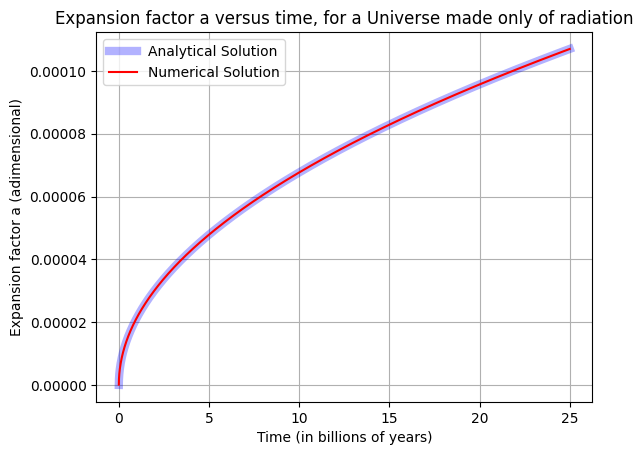

In [5]:
t = np.linspace(0,25,100000) #time interval
sol = odeint(aR,[0.0000001],t) #solving ODE, with y(0) \approx 0
aRList = [aRanalytic(tv) for tv in t] #list of values for analytical solution
plt.plot(t,aRList, "b", label='Analytical Solution', linestyle="-",alpha=0.3, linewidth=6,)
plt.plot(t,sol,"r", label='Numerical Solution')
plt.title('Expansion factor a versus time, for a Universe made only of radiation')
plt.xlabel('Time (in billions of years)')
plt.ylabel('Expansion factor a (adimensional)')
plt.legend()
plt.grid()
plt.show()

For an Universe made only of Dark Energy, we would have:

In [ ]:
#function for a Universe made only of dark energy
def aDEdt (a,t): #numerical solution
    H_0 = 2.29*(10**-10) #hubble constant H_0
    dDEdt = H_0*a
    return dDEdt
def aDEanalytic(t): #analytical solution
    H_0 = 2.29*(10**-10) #hubble constant H_0
    aDE = np.exp(H_0*t)
    return aDE

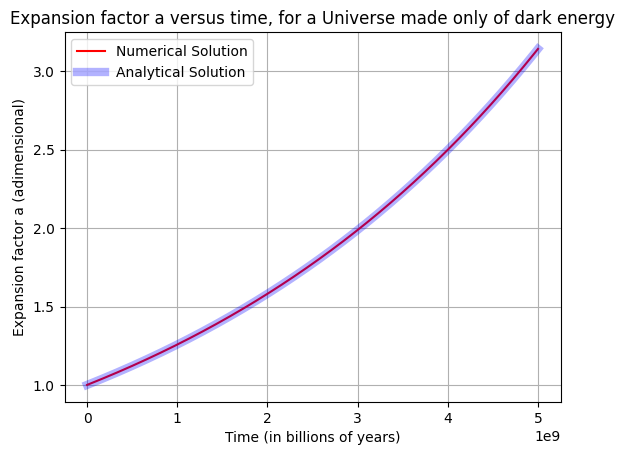

In [7]:
t = np.linspace(0,5000000000,1000) #time interval
solDE = odeint(aDEdt,[1.0],t) #ODE solution, with y(0) = 1.0
aDEList = [aDEanalytic(tv) for tv in t] #values for analytical solution
plt.plot(t,solDE,"r", label='Numerical Solution')
plt.plot(t,aDEList, "b", linestyle="-",alpha=0.3, linewidth=6, label='Analytical Solution')
plt.title('Expansion factor a versus time, for a Universe made only of dark energy')
plt.xlabel('Time (in billions of years)')
plt.ylabel('Expansion factor a (adimensional)')
plt.legend()
plt.grid()
plt.show()

For the analysis of our Universe, we begin by calculating the $\frac{8 \pi G * \text{critical density}}{3}$ factor.

In [ ]:
#Calculating 8*pi*G*critical_density/3, in Gyr
G = 6.67 *(10**-11) #gravitational constant, m3/kg s2
critical_density = 8.5 *(10**-27) #critical density em kg/m3
factor = np.sqrt((8 * np.pi * G/3)*critical_density)
convertion = factor*(3.15*(10**16)) #converting this factor from seconds to Gyr
print(convertion)

0.06865026785676026


We then define a function to model how each components' density evolves over time, and then the Right-Hand Side of the Friedmann Equation.

In [17]:
#function to calculate how densities change with Universe expansion
def density(a,densityM=0.315,densityR=5.38*(10**-5),densityDE=0.685):
    r1 = densityM/(a)
    r2 = densityR/(a**2)
    r3 = densityDE*(a**2)
    r4 = r1+r2+r3
    return r4
#ODE for our Universe, without considering curvature
def RHS(a,t):
    factor = 0.0688 #8*pi*G*critic_density/3, in Gyr
    densityM = 0.315
    densityR = 5.38*(10**-5)
    densityDE = 0.685
    dadt = factor*np.sqrt((density(a,densityM=densityM,densityR=densityR,densityDE=densityDE)))
    return dadt

By convention, we set a=1, t=0 for today. Then, the evolution for the scale factor in the future will be:

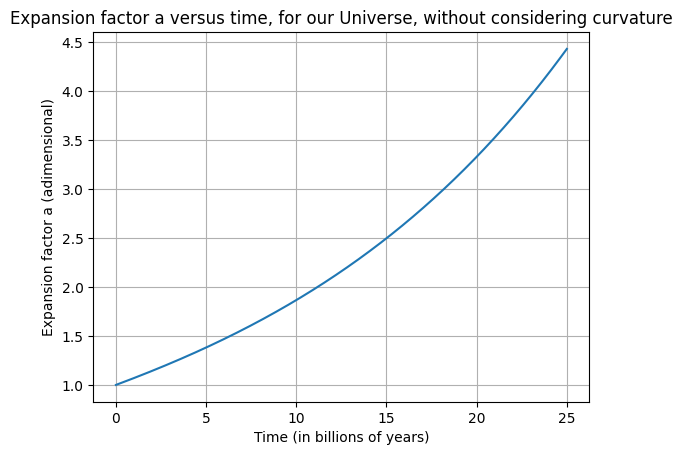

In [18]:
t = np.linspace(0, 25, 30000) #time interval, with 0 being today
sol = odeint(RHS,[1],t) #ODE solution, with y(0)=1
plt.plot(t, sol)
plt.xlabel('Time (in billions of years)')
plt.ylabel('Expansion factor a (adimensional)')
plt.grid()
plt.title('Expansion factor a versus time, for our Universe, without considering curvature')
plt.show()

We can also solve the Friedmann Equation backwards, and find the scale factor evolution in the past.

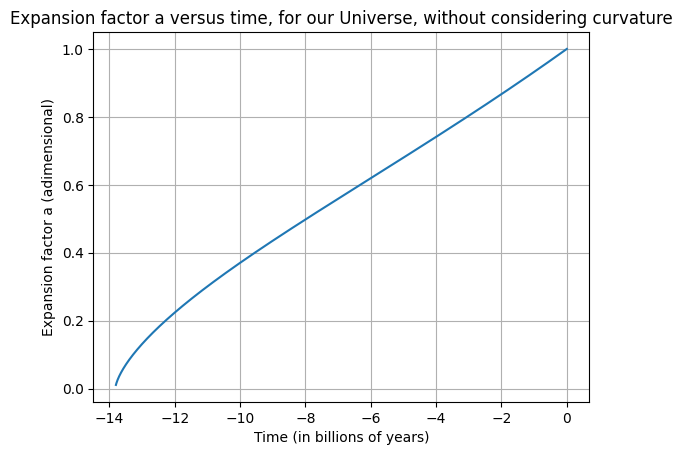

In [11]:
#factor a, with -13 being big bang, and 0 being today
t = np.linspace(0, -13.8, 30000) #time interval
sol = odeint(RHS,[1],t) #ODE solving, with y(0) = 1
plt.plot(t, sol)
plt.xlabel('Time (in billions of years)')
plt.ylabel('Expansion factor a (adimensional)')
plt.grid()
plt.title('Expansion factor a versus time, for our Universe, without considering curvature')
plt.show()

For this part, we use Euler's method for integration.

In [12]:
#manual numerical integration with euler's method
def integration(f,t,a0):
    a = np.zeros(len(t))
    a[0]= a0
    k = 0
    while k <(len(t)-1):
        a[k+1]= a[k]+(f(a[k])*(t[k+1]-t[k]))
        k = k+1
    return a

We define how matter and radiation densities evolve depending on the scale factor:

In [13]:
#matter and radiation densities varying with expansion factor a
def dM (a,dM0):
    dM = dM0/(a**3)
    return dM
def dR(a,dR0):
    dR = dR0/(a**4)
    return dR

For this part, we want to analyse how each component's density evolves over time. For this, we need to see how the total density evolves:

In [38]:
def density(a,densityM=0.315,densityR=5.38*(10e-5),densityDE=0.685):
#function to calculate how densities change with Universe expansion
    r1 = densityM/(a)
    r2 = densityR/(a**2)
    r3 = densityDE*(a**2)
    r4 = r1+r2+r3
    return r4
def RHS2(a): #ODE without time dependency
    factor = 0.0687527
    densityM = 0.315 
    densityR = 5.38*(10e-5) 
    densityDE = 0.685 
    dadt = factor*np.sqrt((density(a,densityM=densityM,densityR=densityR,densityDE=densityDE))) 
    return dadt

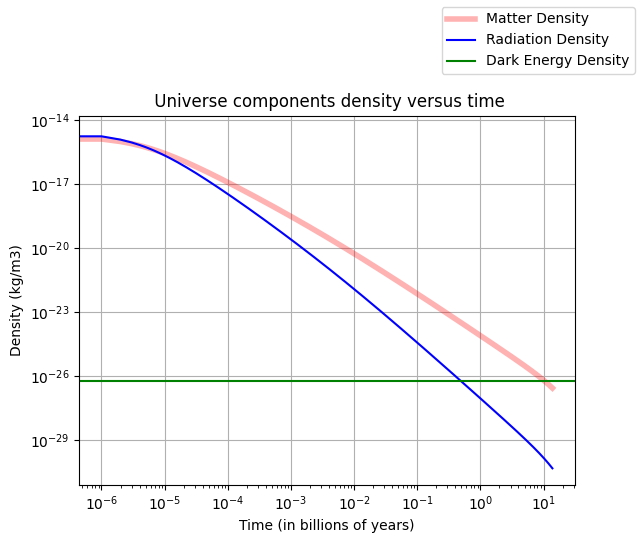

In [39]:
ta = np.linspace(13.8,1e-1,10000)
ta2 = np.linspace(1e-1,0,100000)
tsum =np.array(ta.tolist()+ta2.tolist()) #time interval from big bang to today
a = integration(RHS2,tsum,1) #numerical integration, using euler's method
densityMatter = dM(a,2.688e-27) #how matter density changes with expansion factor a
densityRadiation = dR(a,4.591e-31) #how radiation density changes with expansion factor a
plt.plot(tsum,densityMatter,"r",linestyle="-",alpha=0.3, linewidth=4, label='Matter Density')
plt.plot(tsum,densityRadiation,"b", label='Radiation Density')
plt.axhline(y = 5.845e-27, color='g', linestyle='-', label='Dark Energy Density')
plt.figlegend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Time (in billions of years)')
plt.ylabel('Density (kg/m3)')
plt.title('\n \n \n \n Universe components density versus time')
plt.grid()
plt.show()